In [11]:
import pynumdiff
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [6]:
def get_data(problem, noise, dt, timeseries_length):
    r = pynumdiff.utils.simulate.__dict__[problem](timeseries_length, noise_parameters=[0, noise], dt=dt)
    x, x_truth, dxdt_truth, _ = r
    t = np.linspace(0, timeseries_length, len(x))
    #dt = np.mean(np.diff(t))
    return x, x_truth, dxdt_truth, t, dt

# Lorenz

Text(0,0.5,'x')

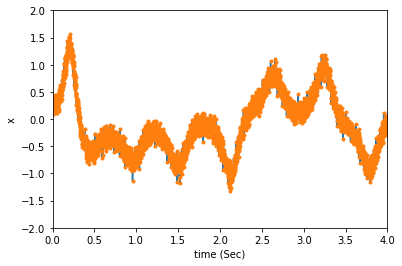

In [9]:
dt = 0.001
noise = 0.1
timeseries_length = 4
problem = 'lorenz_x'

x, x_truth, dxdt_truth, t, dt = get_data(problem, noise, dt, timeseries_length)

plt.plot(t, x)
plt.plot(t, x, '.')
plt.xlim(0, 4)
plt.ylim(-2,2)
plt.xlabel('time (Sec)')
plt.ylabel('x')

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


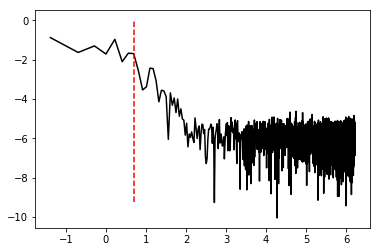

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

yf = scipy.fftpack.fft(x)
N = len(t)
xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)

P = np.log(2.0/N * np.abs(yf[:N//2]))
ax.plot(np.log(xf), P, color='black', zorder=-10)
#ax.vlines(np.log(0.005), np.log(1e-4), np.log(1), linestyle='--', color='red')
ax.vlines(np.log(2), np.log(1e-4), np.log(1), linestyle='--', color='red')

frequencies = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2])
power = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0])

#ax.set_ylim(1e-4, 1)


In [28]:
gamma = 1


method_parent = 'linear_model'
method = 'savgoldiff'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
x_smooth, xdot_smooth_savgoldiff = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

method_parent = 'smooth_finite_difference'
method = 'butterdiff'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
x_smooth, xdot_smooth_butterdiff = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

method_parent = 'kalman_smooth'
method = 'constant_acceleration'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=gamma)
x_smooth, xdot_smooth_kalman = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

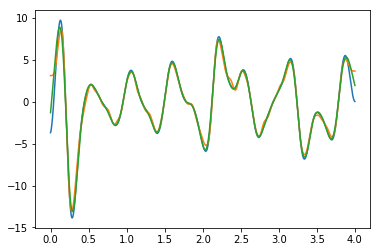

In [30]:
plt.plot(t, xdot_smooth_butterdiff)
plt.plot(t, xdot_smooth_savgoldiff)
plt.plot(t, xdot_smooth_kalman)

